<a href="https://colab.research.google.com/github/Michalinh0/DS2022/blob/main/waveenergyconverters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przygotowanie danych oraz bibliotek do działania notatnika

Import bibliotek


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

 Pobranie i wstępna obróbka danych

In [122]:
data_adelaide = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/sources/Adelaide_Data.csv")
data_sydney = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/sources/Sydney_Data.csv")
data_perth = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/sources/Perth_Data.csv")
data_tasmania = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/sources/Tasmania_Data.csv")

strOfNames = []

for i in range (16):
  strOfNames.append("X" + str(i+1))
for i in range (16):
  strOfNames.append("Y" + str(i+1))
for i in range (16):
  strOfNames.append("P" + str(i+1))
strOfNames.append("Total")

data_adelaide.columns = strOfNames
data_sydney.columns = strOfNames
data_perth.columns = strOfNames
data_tasmania.columns = strOfNames

Przygotowanie wektora wejściowego

In [123]:
lista = []

for i in range(16):
  arg1, arg2 = "X" + str(i+1) , "Y" + str(i+1)
  lista.append(arg1)
  lista.append(arg2)


print(lista)

['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11', 'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14', 'Y14', 'X15', 'Y15', 'X16', 'Y16']


# Omówienie

Dane na których pracowaliśmy pobraliśmy ze strony: https://archive.ics.uci.edu/ml/datasets/Wave+Energy+Converters

Forma danych:

|Kolumny |Co reprezentują      |Typy danych                  |
|--------|---------------------|-----------------------------|
|1-16    |Pozycje X konwerterów|Wartości od 0 - 566 (metrów) |
|17-32   |Pozycje Y konwerterów|Wartości od 0 - 566 (metrów) |
|33-48   |Zaabsorbowana moc    |Wartości (waty)				       |
|49      |Suma wszystkich mocy |Wartości (waty)              |

Cel: Optymalizacja zestawu pozycji w celu pozyskiwania jak największej ilości prądu.

Sposób:

# Adelaide

Macierz korelacji

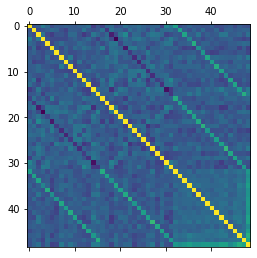

In [97]:
corr = data_adelaide.corr()

plt.matshow(corr)

Regresja liniowa

In [98]:
x = data_adelaide[lista].values.reshape(-1, 1)[:1000]
y = data_adelaide["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ocenianie jakości modelu

In [99]:
y_pred = model.predict(X_test)

print("Średni procent błędu dla regresji liniowej:")
print()
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Średni procent błędu dla regresji liniowej:

2.230552195494507 %
RMSE: 30562.76210933114


Biblioteka xgboost

In [100]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5, alpha = 0.2, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Średni procent błędu dla biblioteki xgboost:")
print(str((rmse/np.mean(y))*100)+" %")
print()
print("RMSE: %f" % (rmse))

Średni procent błędu dla biblioteki xgboost:
2.2506700583230366 %

RMSE: 30838.414684


Biblioteka multi-layer perceptron

In [101]:
regr = MLPRegressor(random_state = 1, max_iter = 5000, learning_rate_init = 0.05).fit(X_train, np.ravel(y_train))

y_pred = regr.predict(X_test) 

print("Średni procent błędu dla biblioteki multi-layer perceptron")
print(str((np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y))*100)+" %")
print()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")

Średni procent błędu dla biblioteki multi-layer perceptron
2.2877986706256572 %

RMSE: 31347.146534212625


Biblioteka lightgbm

In [102]:
model = lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,random_state=40)
model.fit(X_train,np.ravel(y_train))

y_pred = model.predict(X_test)

print("Średni procent błędu dla biblioteki lightgbm:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Średni procent błędu dla biblioteki lightgbm:
2.284683362000653 %

RMSE: 31304.460944251772


# Sydney

Macierz korelacji

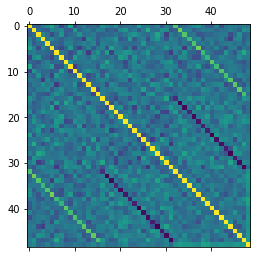

In [103]:
corr = data_sydney.corr()

plt.matshow(corr)

Liniowa regresja

In [104]:
x = data_sydney[lista].values.reshape(-1, 1)[:1000]
y = data_sydney["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ocenianie jakości modelu

In [105]:
y_pred = model.predict(X_test)

print("Średni procent błędu dla regresji liniowej:")
print()
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Średni procent błędu dla regresji liniowej:

1.210814914608987 %
RMSE: 18004.566811807086


Biblioteka xgboost

In [106]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5, alpha = 0.2, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Średni procent błędu dla biblioteki xgboost:")
print(str((rmse/np.mean(y))*100)+" %")
print()
print("RMSE: %f" % (rmse))

Średni procent błędu dla biblioteki xgboost:
1.2820537254437734 %

RMSE: 19063.873163


Biblioteka multi-layer perceptron

In [107]:
regr = MLPRegressor(random_state = 1, max_iter = 5000, learning_rate_init = 0.05).fit(X_train,np.ravel(y_train))
y_pred=regr.predict(X_test)

print("Średni procent błędu dla biblioteki multi-layer perceptron")
print(str((np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y))*100)+" %")
print()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")

Średni procent błędu dla biblioteki multi-layer perceptron
1.538339677507701 %

RMSE: 22874.792149290224


Biblioteka lightgbm

In [108]:
model = lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,random_state=40)
model.fit(X_train,np.ravel(y_train))

y_pred = model.predict(X_test)

print("Średni procent błędu dla biblioteki lightgbm:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Średni procent błędu dla biblioteki lightgbm:
1.249554427058076 %

RMSE: 18580.61533229603


# Perth

Macierz korelacji

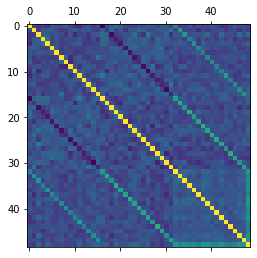

In [109]:
corr = data_perth.corr()

plt.matshow(corr)

Liniowa regresja

In [110]:
x = data_perth[lista].values.reshape(-1, 1)[:1000]
y = data_perth["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ocenianie jakości modelu

In [111]:
y_pred = model.predict(X_test)

print("Średni procent błędu dla regresji liniowej:")
print()
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Średni procent błędu dla regresji liniowej:

3.1948660058205354 %
RMSE: 45479.08552213714


Biblioteka xgboost

In [112]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5, alpha = 0.2, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Średni procent błędu dla biblioteki xgboost:")
print(str((rmse/np.mean(y))*100)+" %")
print()
print("RMSE: %f" % (rmse))

Średni procent błędu dla biblioteki xgboost:
3.3299645244969436 %

RMSE: 47402.220037


Biblioteka multi-layer perceptron

In [113]:
regr = MLPRegressor(random_state = 1, max_iter = 5000, learning_rate_init = 0.05).fit(X_train,np.ravel(y_train))
y_pred=regr.predict(X_test)

print("Średni procent błędu dla biblioteki multi-layer perceptron")
print(str((np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y))*100)+" %")
print()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")

Średni procent błędu dla biblioteki multi-layer perceptron
3.420200507840877 %

RMSE: 48686.734002480625


Biblioteka lightgbm

In [114]:
model = lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,random_state=40)
model.fit(X_train,np.ravel(y_train))

y_pred = model.predict(X_test)

print("Średni procent błędu dla biblioteki lightgbm:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Średni procent błędu dla biblioteki lightgbm:
3.2887686884408263 %

RMSE: 46815.79514497139


# Tasmania

Macierz korelacji

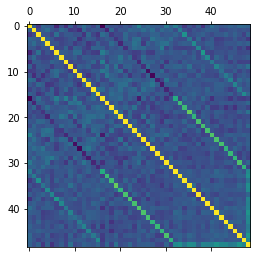

In [115]:
corr = data_tasmania.corr()

plt.matshow(corr)

Liniowa regresja

In [116]:
x = data_tasmania[lista].values.reshape(-1, 1)[:1000]
y = data_tasmania["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ocenianie jakości modelu

In [117]:
y_pred = model.predict(X_test)

print("Średni procent błędu dla regresji liniowej:")
print()
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Średni procent błędu dla regresji liniowej:

1.5453305766822403 %
RMSE: 57459.648535016095


Biblioteka xgboost

In [118]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5, alpha = 0.2, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Średni procent błędu dla biblioteki xgboost:")
print(str((rmse/np.mean(y))*100)+" %")
print()
print("RMSE: %f" % (rmse))

Średni procent błędu dla biblioteki xgboost:
1.6511788585760352 %

RMSE: 61395.379289


Biblioteka multi-layer-perceptron

In [119]:
regr = MLPRegressor(random_state = 1, max_iter = 5000, learning_rate_init = 0.05).fit(X_train,np.ravel(y_train))
y_pred=regr.predict(X_test)

print("Średni procent błędu dla biblioteki multi-layer perceptron")
print(str((np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y))*100)+" %")
print()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")

Średni procent błędu dla biblioteki multi-layer perceptron
1.6160751340222532 %

RMSE: 60090.12609228396


Biblioteka lightgbm

In [120]:
model = lgb.LGBMRegressor(learning_rate=0.05,max_depth=5,random_state=40)
model.fit(X_train,np.ravel(y_train))

y_pred = model.predict(X_test)

print("Średni procent błędu dla biblioteki lightgbm:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Średni procent błędu dla biblioteki lightgbm:
1.5869571625650232 %

RMSE: 59007.439687684906
